This notebook outlines the steps in downloading the raw data and then formatting and cleaning it.

To reproduce the steps in this notebook:
1. download the code repository
1. run "make data" in a terminal opened at the location of the repository
    * this will first download and install all code dependencies, so it is recommended to run this in a virtual environment
    * then it will download and run the data formatting and cleaning steps carried out in this notebook
    
The data will then be downloaded and processed ready to move on to the next steps.

In [1]:
# common notebook config
%run notebook-config.ipynb

autoreload enabled
numpy imported as np (1.19.5)
pandas imported as pd (1.2.1)
Pandas display: Remove maximum column width
Pandas display: Show up to 100 columns in tables
Pandas display: Show up to 100 rows in tables
Pandas display: Set floats to show up to 3 decimal places
matplotlib: show plots inline
matplotlib imported as mpl (3.3.3)
matplotlib.pyplot imported as plt
matplotlib: use ggplot style
seaborn: set white grid theme
Logging: show log messages in ipython


In [2]:
from src.data import make_dataset

In [3]:
raw_filepath = "../data/raw"
interim_filepath = "../data/interim"

## Download data

* premier league and championship matches from the 2000/01 season onwards from football-data.co.uk
* previous seasons have less information

In [4]:
make_dataset.download_match_data(raw_filepath)

Downloaded file: ../data/raw/2000-E0.csv
Downloaded file: ../data/raw/2000-E1.csv
Downloaded file: ../data/raw/2001-E0.csv
Downloaded file: ../data/raw/2001-E1.csv
Downloaded file: ../data/raw/2002-E0.csv
Downloaded file: ../data/raw/2002-E1.csv
Downloaded file: ../data/raw/2003-E0.csv
Downloaded file: ../data/raw/2003-E1.csv
Downloaded file: ../data/raw/2004-E0.csv
Downloaded file: ../data/raw/2004-E1.csv
Downloaded file: ../data/raw/2005-E0.csv
Downloaded file: ../data/raw/2005-E1.csv
Downloaded file: ../data/raw/2006-E0.csv
Downloaded file: ../data/raw/2006-E1.csv
Downloaded file: ../data/raw/2007-E0.csv
Downloaded file: ../data/raw/2007-E1.csv
Downloaded file: ../data/raw/2008-E0.csv
Downloaded file: ../data/raw/2008-E1.csv
Downloaded file: ../data/raw/2009-E0.csv
Downloaded file: ../data/raw/2009-E1.csv
Downloaded file: ../data/raw/2010-E0.csv
Downloaded file: ../data/raw/2010-E1.csv
Downloaded file: ../data/raw/2011-E0.csv
Downloaded file: ../data/raw/2011-E1.csv
Downloaded file:

## Reformat data

* changes column headings to be human readable. For example, HST will be renamed to home_shotsOnTarget
* the date format will be standardised as the CSV files have a mixture of formats
* they will be combined in a single CSV file which will be easier to manipulate

In [5]:
make_dataset.standardise_data_format(raw_filepath, interim_filepath)

Standardising data...
Loading: ../data/raw/2000-E0.csv
Loading: ../data/raw/2000-E1.csv
Loading: ../data/raw/2001-E0.csv
Loading: ../data/raw/2001-E1.csv
Loading: ../data/raw/2002-E0.csv
Loading: ../data/raw/2002-E1.csv
Loading: ../data/raw/2003-E0.csv
Loading: ../data/raw/2003-E1.csv
Loading: ../data/raw/2004-E0.csv
Loading: ../data/raw/2004-E1.csv
Loading: ../data/raw/2005-E0.csv
Loading: ../data/raw/2005-E1.csv
Loading: ../data/raw/2006-E0.csv
Loading: ../data/raw/2006-E1.csv
Loading: ../data/raw/2007-E0.csv
Loading: ../data/raw/2007-E1.csv
Loading: ../data/raw/2008-E0.csv
Loading: ../data/raw/2008-E1.csv
Loading: ../data/raw/2009-E0.csv
Loading: ../data/raw/2009-E1.csv
Loading: ../data/raw/2010-E0.csv
Loading: ../data/raw/2010-E1.csv
Loading: ../data/raw/2011-E0.csv
Loading: ../data/raw/2011-E1.csv
Loading: ../data/raw/2012-E0.csv
Loading: ../data/raw/2012-E1.csv
Loading: ../data/raw/2013-E0.csv
Loading: ../data/raw/2013-E1.csv
Loading: ../data/raw/2014-E0.csv
Loading: ../data/raw/

## Analysis to identify data cleaning steps

In [6]:
matches = pd.read_csv("{}/matches_raw.csv".format(interim_filepath))

# Show random sample of records for quick check
matches.sample(10)

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
7681,2008-10-25,Nott'm Forest,Cardiff,0.000,1.000,A,12.000,8.000,7.000,2.000,6.000,2.000,15.000,14.000,0.000,2.000,0.000,0.000,2.600,3.100,2.300,2.620,3.200,2.300,E,2008,championship
13494,2014-12-26,West Brom,Man City,1.000,3.000,A,18.000,9.000,6.000,5.000,10.000,6.000,5.000,9.000,0.000,1.000,0.000,0.000,7.000,4.000,1.450,7.000,4.000,1.500,E,2014,premier
1134,2001-10-13,Crystal Palace,Wimbledon,4.000,0.000,H,13.000,11.000,7.000,4.000,6.000,2.000,9.000,13.000,1.000,2.000,0.000,0.000,2.400,2.900,2.400,2.370,3.100,2.620,E,2001,championship
1078,2001-09-22,Arsenal,Bolton,1.000,1.000,D,23.000,7.000,12.000,4.000,17.000,0.000,9.000,11.000,1.000,1.000,0.000,1.000,1.350,3.800,6.200,1.280,4.500,8.000,E,2001,premier
19140,2021-01-30,Cardiff,Millwall,1.000,1.000,D,17.000,5.000,3.000,1.000,5.000,3.000,10.000,14.000,3.000,0.000,0.000,0.000,2.300,3.050,3.250,2.300,3.200,3.200,E,2020,championship
14324,2015-11-28,Cardiff,Burnley,2.000,2.000,D,18.000,11.000,7.000,3.000,8.000,4.000,9.000,6.000,1.000,0.000,0.000,0.000,2.700,3.100,2.400,3.000,3.000,2.500,E,2015,championship
2438,2003-01-19,Watford,Norwich,2.000,1.000,H,13.000,7.000,6.000,2.000,7.000,2.000,15.000,12.000,3.000,1.000,0.000,0.000,2.100,3.100,3.000,2.000,3.200,3.200,E,2002,championship
6760,2007-10-23,Burnley,Norwich,2.000,1.000,H,12.000,13.000,7.000,7.000,12.000,6.000,14.000,9.000,2.000,1.000,0.000,0.000,1.750,3.300,3.800,NaN,NaN,NaN,E,2007,championship
11846,2013-02-23,Reading,Wigan,0.000,3.000,A,7.000,14.000,1.000,8.000,2.000,9.000,9.000,11.000,1.000,1.000,1.000,0.000,2.200,3.300,3.100,2.620,3.100,2.800,E,2012,premier
17798,2019-08-30,Cardiff,Fulham,1.000,1.000,D,9.000,11.000,2.000,4.000,4.000,3.000,16.000,8.000,1.000,3.000,0.000,1.000,2.800,3.400,2.400,2.880,3.400,2.450,E,2019,championship


In [7]:
print("Matches rows and columns: {}".format(matches.shape))
matches.describe()

Matches rows and columns: (19172, 27)


,home_goals,away_goals,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,season
count,19172.000,19172.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19171.000,19062.000,19062.000,19062.000,18880.000,18880.000,18880.000,19172.000
mean,1.479,1.135,13.116,10.399,5.874,4.625,6.073,4.824,11.542,12.144,1.371,1.731,0.065,0.096,2.319,3.402,3.657,2.408,3.472,3.952,2009.791
std,1.243,1.094,4.902,4.349,3.106,2.656,3.008,2.663,3.806,3.961,1.162,1.281,0.257,0.314,1.061,0.636,2.115,1.228,0.667,2.581,5.942
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.050,2.500,1.120,1.050,2.750,1.120,2000.000
25%,1.000,0.000,10.000,7.000,4.000,3.000,4.000,3.000,9.000,9.000,0.000,1.000,0.000,0.000,1.750,3.100,2.500,1.750,3.200,2.600,2005.000
50%,1.000,1.000,13.000,10.000,5.000,4.000,6.000,5.000,11.000,12.000,1.000,2.000,0.000,0.000,2.100,3.200,3.100,2.150,3.300,3.200,2010.000
75%,2.000,2.000,16.000,13.000,8.000,6.000,8.000,6.000,14.000,15.000,2.000,3.000,0.000,0.000,2.500,3.450,4.000,2.600,3.500,4.330,2015.000
max,9.000,9.000,43.000,35.000,27.000,20.000,22.000,19.000,33.000,35.000,11.000,9.000,3.000,3.000,20.000,12.000,30.000,21.000,15.000,46.000,2020.000


We can see that some features do not have the expected count as given by the matches row number above. This means that there are some null values.

In [8]:
# Check null values in any of the following columns
columns_to_check = [
    "league",
    "season",
    "division",
    "home_goals",
    "away_goals"
]

# These are important values, so these should not be null

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


In [9]:
# Check null values in any of the following columns
columns_to_check = [
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]

# These may be used later, but we can handle null values if needed

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
173,2000-09-30,Gillingham,Sheffield Weds,2.000,0.000,H,17.000,8.000,7.000,5.000,6.000,6.000,5.000,12.000,0.000,1.000,0.000,0.000,NaN,NaN,NaN,1.900,3.400,3.250,E,2000,championship
840,2001-04-18,Crewe,Bolton,2.000,1.000,H,10.000,18.000,5.000,11.000,2.000,3.000,6.000,9.000,0.000,1.000,0.000,0.000,NaN,NaN,NaN,2.750,3.200,2.250,E,2000,championship
867,2001-04-28,Nott'm Forest,Gillingham,0.000,1.000,A,12.000,8.000,5.000,3.000,9.000,2.000,9.000,7.000,2.000,3.000,0.000,0.000,NaN,NaN,NaN,1.570,3.500,5.000,E,2000,championship
873,2001-04-28,Barnsley,Bolton,0.000,1.000,A,10.000,10.000,4.000,4.000,7.000,2.000,14.000,20.000,2.000,2.000,1.000,0.000,NaN,NaN,NaN,3.000,3.400,2.000,E,2000,championship
874,2001-04-28,Sheffield United,Burnley,2.000,0.000,H,10.000,9.000,4.000,3.000,1.000,3.000,12.000,18.000,1.000,3.000,0.000,1.000,NaN,NaN,NaN,2.370,3.300,2.500,E,2000,championship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14133,2015-09-21,Derby,Burnley,0.000,0.000,D,21.000,9.000,4.000,3.000,7.000,5.000,4.000,10.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,2.150,3.200,3.500,E,2015,championship
15813,2017-05-07,Bristol City,Birmingham,0.000,1.000,A,20.000,14.000,1.000,7.000,7.000,6.000,18.000,14.000,1.000,7.000,0.000,0.000,NaN,NaN,NaN,2.620,3.300,2.620,E,2016,championship
15816,2017-05-07,Brentford,Blackburn,1.000,3.000,A,22.000,16.000,5.000,5.000,10.000,4.000,7.000,4.000,0.000,1.000,1.000,0.000,NaN,NaN,NaN,2.500,3.400,2.750,E,2016,championship
16293,2017-12-23,Preston,Nott'm Forest,1.000,1.000,D,15.000,11.000,5.000,5.000,9.000,5.000,6.000,12.000,2.000,4.000,0.000,0.000,1.850,3.450,4.000,NaN,NaN,NaN,E,2017,championship


In [10]:
numeric_features = matches.dtypes[matches.dtypes != "object"].index
columns_already_checked = [
    "league",
    "season",
    "division",
    "home_goals",
    "away_goals",
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]

# Check null values in any of the remaining numeric columns
columns_to_check = [col for col in numeric_features if col not in columns_already_checked]

# These are important values, so these should not be null

# Show records with any null values
matches[matches[columns_to_check].isnull().any(axis=1)]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
17660,2019-04-27,Bolton,Brentford,0.000,1.000,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650,3.850,1.650,5.000,4.000,1.670,E,2018,championship


There is a match (Bolton vs Brentford in 2019) with nan values for all the match stats apart from the goals scored.
This match was initially postponed but then Brentford were given the 0-1 away win without the match being played
* https://en.wikipedia.org/wiki/2018%E2%80%9319_Brentford_F.C._season

## Impute missing values

We will impute the values for the 2019 Bolton/Brentford match using median values from other matches.  We will take the median values from all previous matches in the same division with the same number of home goals and away goals.
Using median ensures that the imputed values are less influenced by any extreme values.
Grouping by league, division, home goals and away goals ensures realistic values for that result. Calculating the median from previous matches prevents leakage of data that was not available at the time.

In [11]:
make_dataset.impute_missing_values(interim_filepath)

Imputing missing values...
Saved file: ../data/interim/matches_imputed_missing.csv
Completed imputing missing values!


In [12]:
# load match data following imputation
matches = pd.read_csv("{}/matches_imputed_missing.csv".format(interim_filepath))

In [13]:
# Check the record
matches[
    (matches.home_team == "Bolton") &
    (matches.away_team == "Brentford") &
    (matches.season == 2018)
]

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
17660,2019-04-27,Bolton,Brentford,0.000,1.000,A,12.000,9.000,4.000,4.000,6.000,4.000,12.000,12.000,1.000,2.000,0.000,0.000,4.650,3.850,1.650,5.000,4.000,1.670,E,2018,championship


Now we will sanity check some feature values.  Shots should always be greater than shots on target.  If this is not true, then it is most likely caused by a data entry mistake.

Unfortunately it is not clear how own goals or penalties are handled in the raw data, so we cannot be sure that goals should always be greater than shots on target.

Players could receive a card without committing a foul, so we shouldn't enforce fouls being greater than cards.

In [14]:
# Sanity check shots
display(matches.loc[matches["home_shotsOnTarget"] > matches["home_shots"]])
display(matches.loc[matches["away_shotsOnTarget"] > matches["away_shots"]])

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
144,2000-09-17,West Brom,Birmingham,1.000,1.000,D,4.000,7.000,5.000,5.000,6.000,4.000,13.000,17.000,0.000,2.000,0.000,0.000,2.350,3.000,2.350,2.620,3.300,2.250,E,2000,championship
197,2000-10-14,Coventry,Tottenham,2.000,1.000,H,0.000,4.000,5.000,5.000,3.000,5.000,12.000,16.000,0.000,4.000,1.000,0.000,2.300,2.900,2.500,2.620,3.100,2.370,E,2000,premier
394,2000-12-02,Wolves,Barnsley,2.000,0.000,H,5.000,4.000,11.000,3.000,5.000,5.000,8.000,8.000,1.000,2.000,0.000,0.000,1.900,3.000,3.100,2.000,3.200,3.200,E,2000,championship
799,2001-04-13,Bradford,Charlton,2.000,0.000,H,4.000,3.000,8.000,8.000,3.000,7.000,13.000,21.000,1.000,3.000,0.000,0.000,2.700,2.900,2.200,2.800,3.200,2.200,E,2000,premier
14433,2015-12-26,Aston Villa,West Ham,1.000,1.000,D,5.000,10.000,8.000,4.000,9.000,6.000,14.000,13.000,3.000,3.000,0.000,0.000,2.650,3.300,2.500,2.700,3.100,2.700,E,2015,premier


,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division
197,2000-10-14,Coventry,Tottenham,2.000,1.000,H,0.000,4.000,5.000,5.000,3.000,5.000,12.000,16.000,0.000,4.000,1.000,0.000,2.300,2.900,2.500,2.620,3.100,2.370,E,2000,premier
281,2000-10-28,Wolves,Watford,2.000,2.000,D,8.000,6.000,8.000,7.000,7.000,6.000,10.000,13.000,0.000,0.000,0.000,0.000,2.700,2.900,2.200,3.000,3.200,2.100,E,2000,championship
701,2001-03-10,Birmingham,Crewe,2.000,0.000,H,12.000,2.000,11.000,10.000,11.000,1.000,9.000,8.000,1.000,0.000,0.000,0.000,1.350,3.800,6.200,1.400,3.600,7.500,E,2000,championship
799,2001-04-13,Bradford,Charlton,2.000,0.000,H,4.000,3.000,8.000,8.000,3.000,7.000,13.000,21.000,1.000,3.000,0.000,0.000,2.700,2.900,2.200,2.800,3.200,2.200,E,2000,premier
875,2001-04-28,West Brom,Huddersfield,1.000,1.000,D,7.000,3.000,4.000,4.000,5.000,5.000,16.000,12.000,2.000,2.000,0.000,0.000,NaN,NaN,NaN,1.720,3.200,4.330,E,2000,championship


Only one of these matches took place outside of the 2000 season - Aston Villa vs West Ham in 2015.
We can see from the following link that the home_shots should have been 15 rather than 5:
* https://www.premierleague.com/match/12285

Note: this match has been corrected on the football-data website now.

It looks like this was a data entry mistake and the 1 was missed.  It would make sense that the others were caused by entry mistakes as well, so we can fix them by adding 10.

## Correct data entry mistakes

Several matches have been identified which have fewer shots than shots on target.  These are most likely due to a missing 1 during data entry, so we will add 10 to each of them.

In [15]:
make_dataset.correct_data_entry_mistakes(interim_filepath)

Correcting data entry mistakes...
Saved file: ../data/interim/matches_corrected.csv
Completed correcting data entry mistakes!


In [16]:
# load match data following correction
matches = pd.read_csv("{}/matches_corrected.csv".format(interim_filepath))

In [17]:
# Ensure there are no longer matches with more shots on target than shots
display(matches.loc[matches["home_shotsOnTarget"] > matches["home_shots"]])
display(matches.loc[matches["away_shotsOnTarget"] > matches["away_shots"]])

,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


,date,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shotsOnTarget,away_shotsOnTarget,home_corners,away_corners,home_fouls,away_fouls,home_yellowCards,away_yellowCards,home_redCards,away_redCards,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division


The correction has worked, so let's move on to checking the distribution of values for each feature.  This will help us identify if there are any extreme outliers.

## Check data distribution for outliers

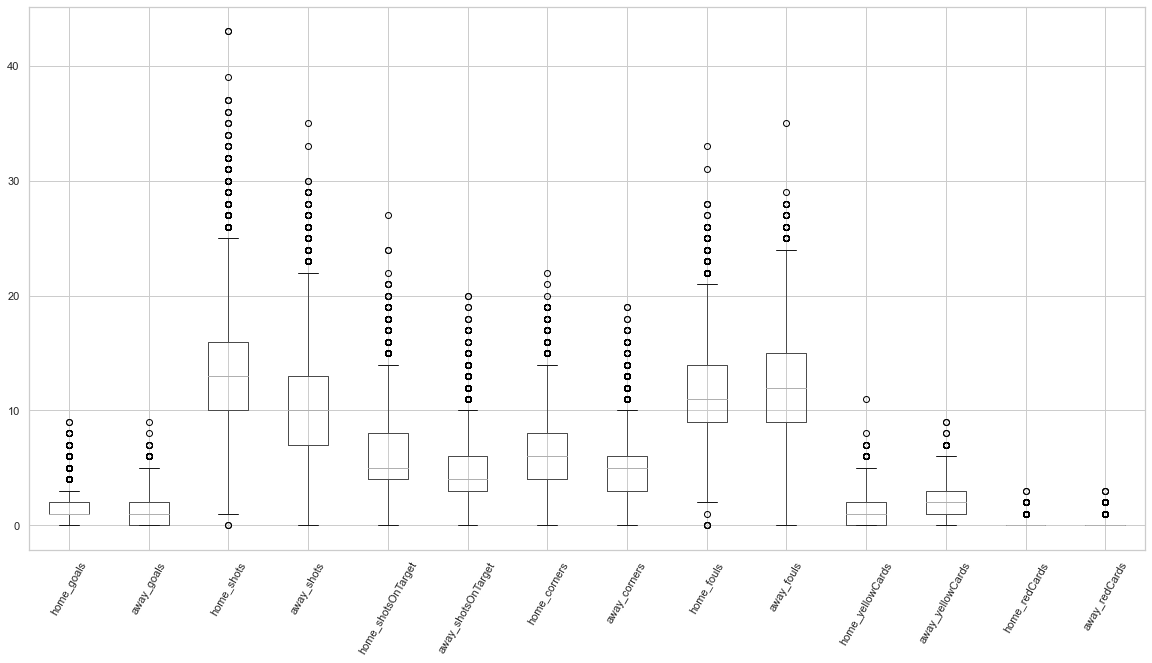

In [18]:
# Using boxplots to look for outliers
exclude_features = [
    "league",
    "season",
    "division",
    "odds_interwetten_homeWin",
    "odds_interwetten_draw",
    "odds_interwetten_awayWin",
    "odds_williamHill_homeWin",
    "odds_williamHill_draw",
    "odds_williamHill_awayWin"
]
feature_columns = [col for col in numeric_features if col not in exclude_features]
matches[feature_columns].boxplot(rot=60, figsize=(20,10))
plt.show()

These plots look reasonable and there are no clear incorrect values. There are quite a few circles representing outliers. It looks like this is due to the distributions being skewed rather than because the data is wrong.

The following extreme values are unlikely but still possible. A match where a team:
* scores 9 goals
* has no shots
* has 43 shots
* commits no fouls
* commits 35 fouls
* gets 11 yellow cards

## Expand features to for and against features

Now we will expand the features in to for and against values.  For example, home goals will be expanded in to home goals for as well as away goals against.  This will make for and against aggregations easier to calculate later.

In [19]:
make_dataset.expand_for_against_values(interim_filepath)

Expanding for and against features...
Saved file: ../data/interim/matches_expanded_features.csv
Expanded for and against features!


In [21]:
# load match data following expansion of features and view a sample
matches = pd.read_csv("{}/matches_expanded_features.csv".format(interim_filepath))

matches.sample(10)

,date,home_team,away_team,result,odds_interwetten_homeWin,odds_interwetten_draw,odds_interwetten_awayWin,odds_williamHill_homeWin,odds_williamHill_draw,odds_williamHill_awayWin,league,season,division,home_goals_for,home_goals_against,away_goals_for,away_goals_against,home_shots_for,home_shots_against,away_shots_for,away_shots_against,home_shotsOnTarget_for,home_shotsOnTarget_against,away_shotsOnTarget_for,away_shotsOnTarget_against,home_corners_for,home_corners_against,away_corners_for,away_corners_against,home_fouls_for,home_fouls_against,away_fouls_for,away_fouls_against,home_yellowCards_for,home_yellowCards_against,away_yellowCards_for,away_yellowCards_against,home_redCards_for,home_redCards_against,away_redCards_for,away_redCards_against
18092,2019-12-07,Fulham,Bristol City,A,1.650,4.000,4.800,1.650,4.200,5.000,E,2019,championship,1.000,2.000,2.000,1.000,21.000,12.000,12.000,21.000,5.000,3.000,3.000,5.000,8.000,2.000,2.000,8.000,15.000,6.000,6.000,15.000,6.000,2.000,2.000,6.000,0.000,0.000,0.000,0.000
17616,2019-04-19,Leeds,Wigan,A,1.330,4.800,8.200,1.350,5.000,9.500,E,2018,championship,1.000,2.000,2.000,1.000,16.000,8.000,8.000,16.000,10.000,2.000,2.000,10.000,15.000,2.000,2.000,15.000,11.000,7.000,7.000,11.000,3.000,3.000,3.000,3.000,0.000,1.000,1.000,0.000
12401,2013-11-10,Sunderland,Man City,H,7.300,4.400,1.400,7.500,4.750,1.400,E,2013,premier,1.000,0.000,0.000,1.000,5.000,24.000,24.000,5.000,2.000,4.000,4.000,2.000,0.000,14.000,14.000,0.000,6.000,13.000,13.000,6.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
4923,2005-10-22,Luton,Plymouth,D,1.600,3.400,4.400,1.660,3.300,4.500,E,2005,championship,1.000,1.000,1.000,1.000,15.000,6.000,6.000,15.000,4.000,2.000,2.000,4.000,4.000,3.000,3.000,4.000,10.000,13.000,13.000,10.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000
14156,2015-09-29,Brentford,Birmingham,A,2.300,3.100,2.800,2.200,3.400,3.200,E,2015,championship,0.000,2.000,2.000,0.000,12.000,17.000,17.000,12.000,3.000,3.000,3.000,3.000,5.000,6.000,6.000,5.000,10.000,6.000,6.000,10.000,2.000,1.000,1.000,2.000,0.000,0.000,0.000,0.000
5154,2005-12-31,Leicester,Norwich,A,2.450,3.000,2.450,2.600,3.100,2.400,E,2005,championship,0.000,1.000,1.000,0.000,14.000,9.000,9.000,14.000,5.000,3.000,3.000,5.000,4.000,4.000,4.000,4.000,16.000,22.000,22.000,16.000,4.000,1.000,1.000,4.000,0.000,0.000,0.000,0.000
6706,2007-10-03,West Brom,Stoke,D,1.700,3.300,4.000,NaN,NaN,NaN,E,2007,championship,1.000,1.000,1.000,1.000,23.000,7.000,7.000,23.000,19.000,5.000,5.000,19.000,8.000,6.000,6.000,8.000,7.000,13.000,13.000,7.000,1.000,4.000,4.000,1.000,0.000,0.000,0.000,0.000
16891,2018-09-15,Swansea,Nott'm Forest,D,2.150,3.250,3.200,2.250,3.300,3.200,E,2018,championship,0.000,0.000,0.000,0.000,5.000,16.000,16.000,5.000,2.000,4.000,4.000,2.000,3.000,10.000,10.000,3.000,4.000,13.000,13.000,4.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000
5920,2006-11-18,Sheffield United,Man United,A,7.500,4.200,1.350,8.000,4.000,1.330,E,2006,premier,1.000,2.000,2.000,1.000,5.000,22.000,22.000,5.000,3.000,15.000,15.000,3.000,0.000,14.000,14.000,0.000,19.000,10.000,10.000,19.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000
6230,2007-02-10,West Ham,Watford,A,1.900,3.100,3.800,1.800,3.300,3.750,E,2006,premier,0.000,1.000,1.000,0.000,23.000,8.000,8.000,23.000,10.000,5.000,5.000,10.000,10.000,4.000,4.000,10.000,17.000,23.000,23.000,17.000,4.000,2.000,2.000,4.000,0.000,0.000,0.000,0.000


We can see that the original columns ("home_goals" etc) are no longer there, but scrolling to the right there are now columns such as "home_goals_for" and "away_goals_against".  This is duplicating the data, but it will make it easier to aggregate team performances from past matches.